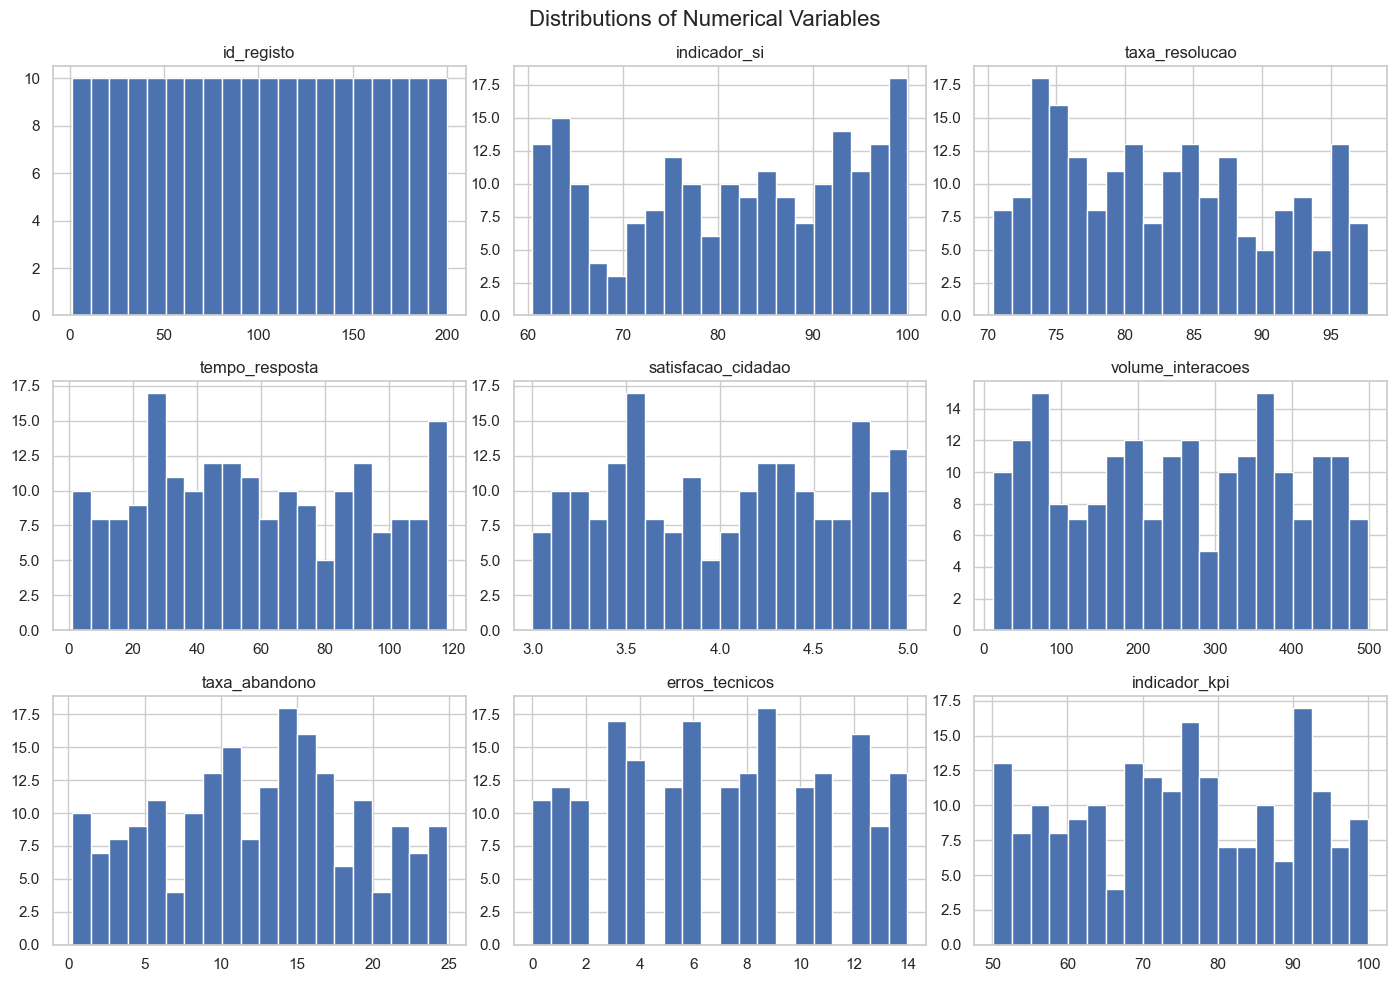

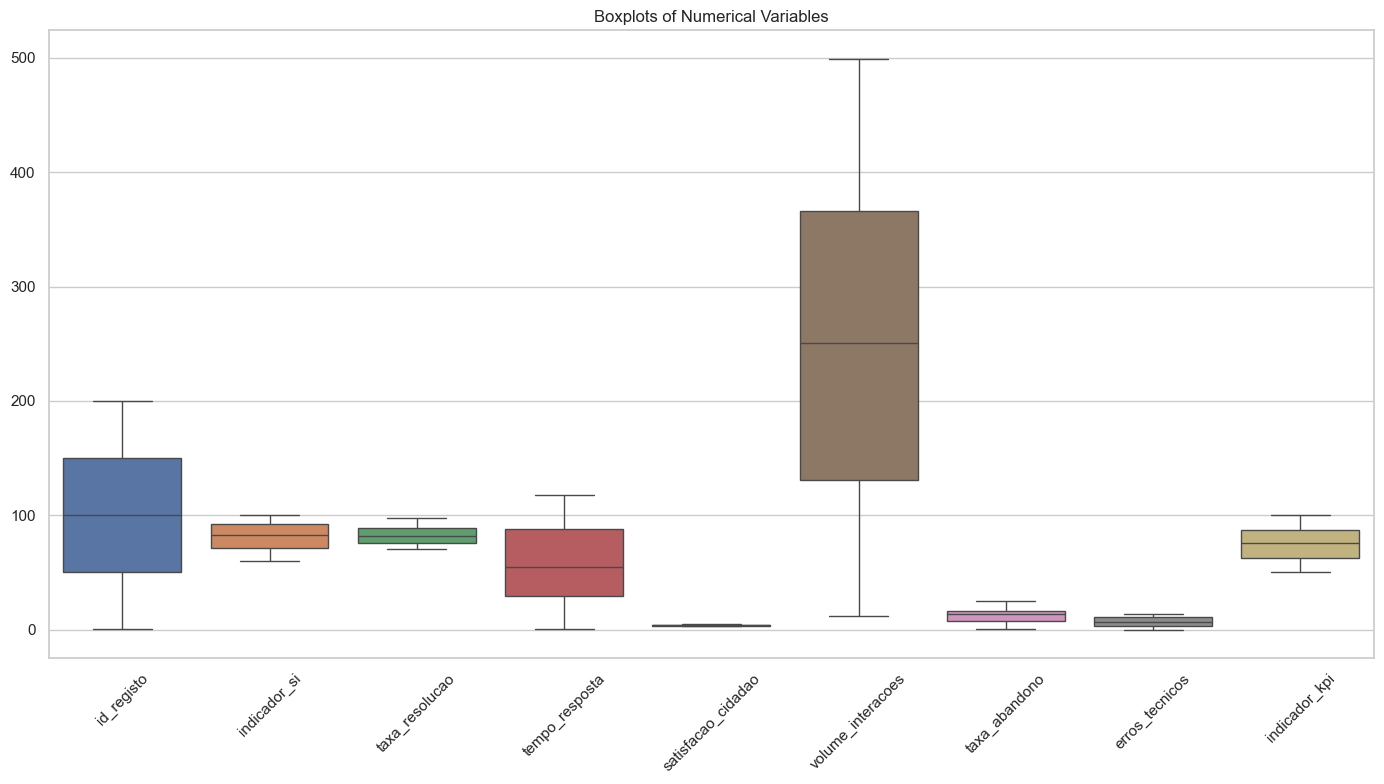

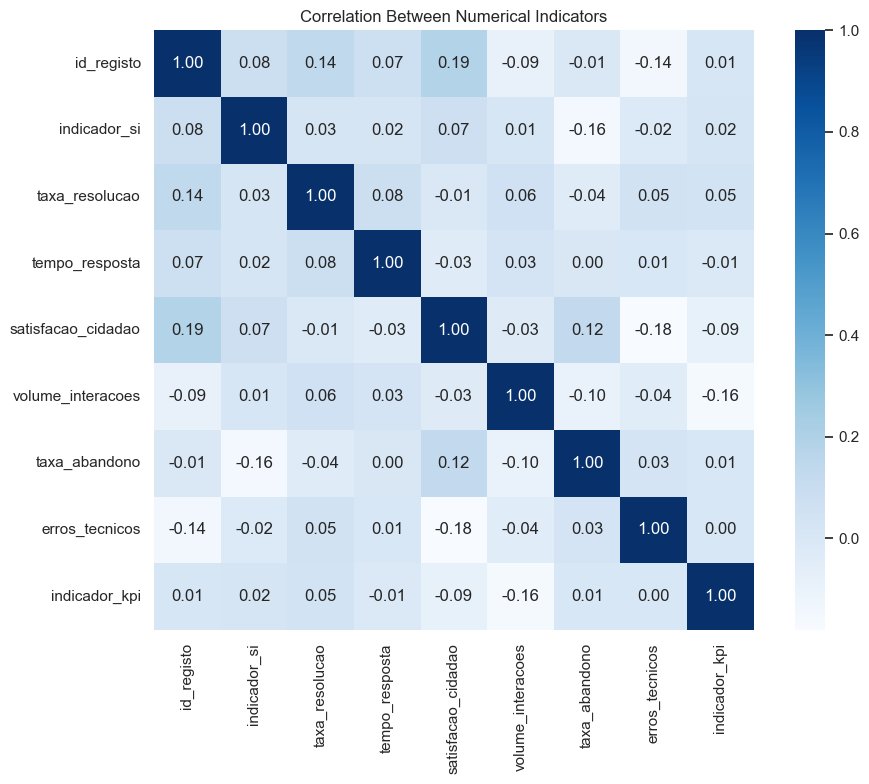

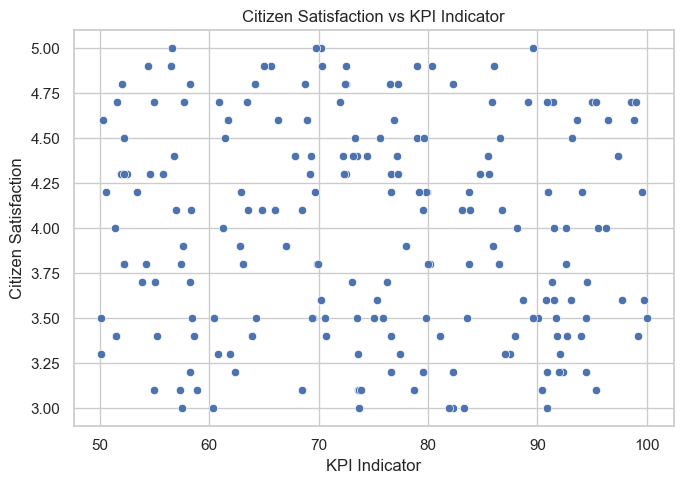

Decision Tree: Predicted vs Real
MSE: 0.409 | MAE: 0.531 | R²: -0.156


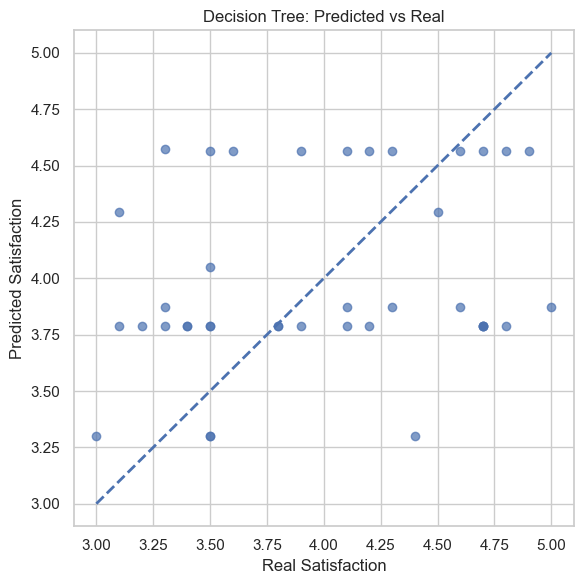

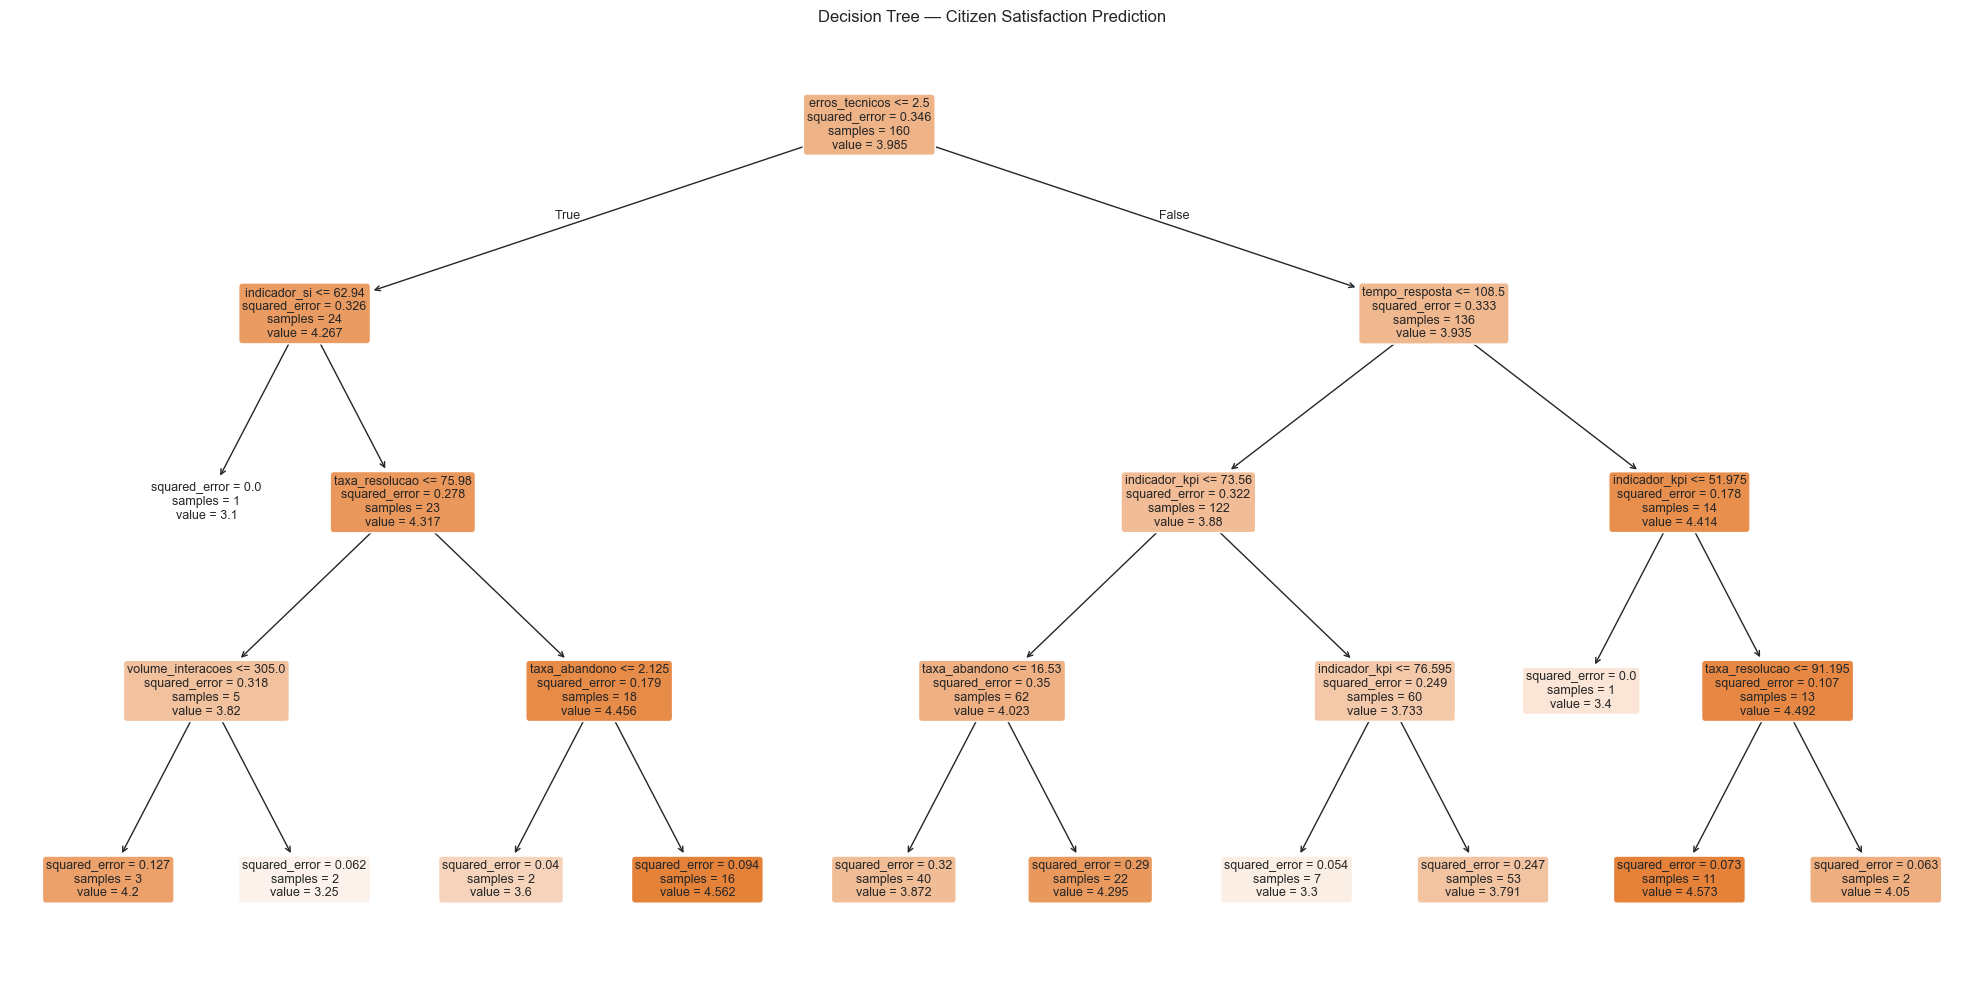

Random Forest: Predicted vs Real
MSE: 0.387 | MAE: 0.533 | R²: -0.092


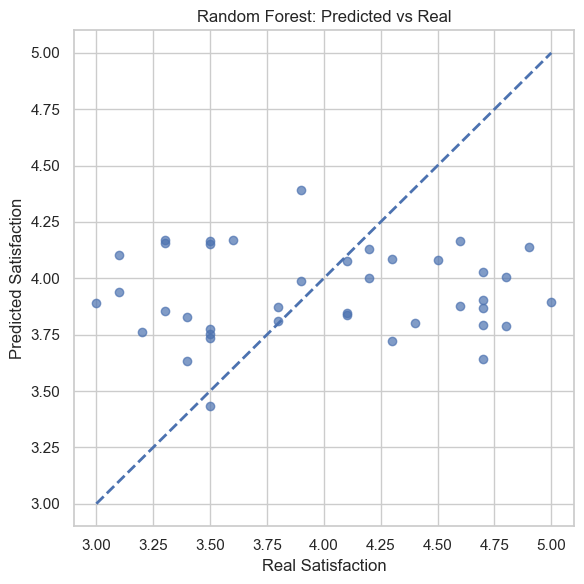

(0.38670641944444345, 0.5330583333333326, -0.09210179350650338)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("images", exist_ok=True)
# melhor visualização
sns.set(style="whitegrid")

# carregar dataset preprocessado
df = pd.read_csv("dataset_governanca_admin_publica_preprocessado.csv")

df.head()

df.describe()

df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Distributions of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Variables")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    square=True
)

plt.title("Correlation Between Numerical Indicators")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["indicador_kpi"],
    y=df["satisfacao_cidadao"]
)
plt.xlabel("KPI Indicator")
plt.ylabel("Citizen Satisfaction")
plt.title("Citizen Satisfaction vs KPI Indicator")
plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split

features = [
    "indicador_si", "taxa_resolucao", "tempo_resposta",
    "volume_interacoes", "taxa_abandono",
    "erros_tecnicos", "indicador_kpi"
]

X = df[features]
y = df["satisfacao_cidadao"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X.shape, y.shape

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_and_plot(y_true, y_pred, title, filename=None):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(title)
    print(f"MSE: {mse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")

    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "--", linewidth=2)
    plt.xlabel("Real Satisfaction")
    plt.ylabel("Predicted Satisfaction")
    plt.title(title)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=200, bbox_inches="tight")

    plt.show()

    return mse, mae, r2

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

evaluate_and_plot(
    y_test, y_pred_dt,
    title="Decision Tree: Predicted vs Real",
    filename="images/decision_tree_scatter.png"
)

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree — Citizen Satisfaction Prediction")
plt.tight_layout()
plt.savefig("images/decision_tree.png", dpi=200, bbox_inches="tight")
plt.show()

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

evaluate_and_plot(
    y_test, y_pred_rf,
    title="Random Forest: Predicted vs Real",
    filename="images/random_forest_scatter.png"
)


